### 魔法命令

#### %run

%run 脚本所在的相对地址\
如：
%run myscript/hello.py

#### %timeit

In [5]:
%timeit L = [i**2 for i in range(10000)]#循环很多次，得到运行时间

3.26 ms ± 43.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


运行了100遍，平均每轮循环约3.64ms。

In [9]:
%%timeit ##测量一个区域
L = []
for i in range(1000):
    L.append(i ** 2)

374 µs ± 3.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### %time

In [10]:
%time L = [i**2 for i in range(10000)]#循环一次

Wall time: 3 ms


In [11]:
%%time
L = []
for i in range(1000):
    L.append(i ** 2)

Wall time: 1 ms


In [12]:
#说明了在这样的情况下，每一次循环的时间差别是很大的，所以timeit得到的平均时间是不准确的
import random
L = [random.random() for i in range(10000)]
%timeit L.sort()

39 µs ± 538 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
L = [random.random() for i in range(10000)]
%time L.sort()

Wall time: 1 ms


In [15]:
%lsmagic #所有的魔法命令

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

### numpy.array基础

In [1]:
import numpy as np
np.__version__

'1.18.1'

#### python list 简介

In [2]:
lst = [i for i in range(10)]
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
lst[5] = "hello"
lst
#python列表中的各个元素类型是可以不同的，但是数组不可以(我感觉也可以)

[0, 1, 2, 3, 4, 'hello', 6, 7, 8, 9]

#### python中的内置的array模块

In [3]:
import array
arr = array.array('f',[i for i in range(10)])# f是type，这里表示浮点型
arr

array('f', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])

In [6]:
arr[5] = 100
arr

array('f', [0.0, 1.0, 2.0, 3.0, 4.0, 100.0, 6.0, 7.0, 8.0, 9.0])

##### 对比
* 注意array和list的不同之处在于，array中的数据类型是相同的。
* 也就是说，python内置的array可以看作限定元素相同的list类型。(我们学java中的数组概念更接近这里的array，无论是普通数组、对象数组)
* array中的数据既不是向量也不是矩阵，没有相关性质，故引入numpy.array（在数据分析师课程中接触过），这里的array可以看作向量和列表，进行运算。


#### numpy中的array（）函数生成数组（矩阵性质），对象类型是array.ndarry

* np.array()
* np.ones()
* np.zeros()
* np.full()
* np.arange()
* np.linspace()

In [9]:
#生成数组,array()中可以传入生成器、列表、元组、数组[[][]]等
arr = np.array(range(10))#传入生成器
arr2 = np.array([i for i in range(10)])#传入列表
print("arr1",arr,"\n","arr2",arr2)

arr1 [0 1 2 3 4 5 6 7 8 9] 
 arr2 [0 1 2 3 4 5 6 7 8 9]


In [8]:
np?
help(np.sort)

Help on function sort in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A si

In [10]:
#改变某个数组元素,但是只能是相同的元素
arr2[3] = 4
arr2

array([0, 1, 2, 4, 4, 5, 6, 7, 8, 9])

In [11]:
#如果传入的元素类型不同，会强行转换，显然被截短了
arr2[3] = 3.5
arr2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
#创建数组时强行转化 
arr3 = np.array([1,2,3.0])
arr3

array([1., 2., 3.])

#### 其他创建数组的办法，详情见'CH01科学计算工具：Numpy'

In [4]:
np.zeros(shape=(2,3),dtype=np.float)
# 形状用元组方式传入，第二个参数是类型

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.ones((5,2,3))
#有三个维度（dim，三个轴axes），由外到内分别是5，2，3
#默认是float64

numpy.ndarray

In [4]:
len(np.ones((5,2,3)))
# 返回第一个维度的元素数量 len(numpy.ndarray)

5

In [6]:
np.full(shape=(2,3),fill_value=666)
np.full((2,3),777)
#这个数组的元素类型是由fill_value决定的

array([[777, 777, 777],
       [777, 777, 777]])

In [22]:
np.arange(start = 0, stop = 20, step = 2) 

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [23]:
np.linspace(start = 0, stop = 18, num = 10)

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

#### random
##### 均匀分布|随机数
* random.randint() 给定范围均匀分布的随机整数
* random.rand() 01之间均匀分布的浮点浮点数
* random.random()  01之间均匀分布的浮点数
* random.uniform() 均匀分布

* random.seed() 随机种子

##### 正太分布|高斯分布
* random.normal() 正太分布|高斯分布
* random.randn() 标准正太分布



In [20]:
np.random?

In [4]:
# 给定范围的均匀分布 （生成随机数）
np.random.randint(10) 
np.random.randint(0,10)#左开右闭，左边默认为0

9

In [46]:
np.random.randint(0,10,size=(2,3))

array([[3, 1, 7],
       [7, 6, 5]])

在指定随机种子的情况下，则生成的随机数是相同的

In [50]:
np.random.seed(100)
np.random.randint(10)

8

In [16]:
# [0,1)之间的均匀分布的随机数
np.random.rand(2,3)

array([[0.68987861, 0.51938231, 0.93713435],
       [0.83017092, 0.50595849, 0.81716183]])

In [5]:
#生成[0,1)之间的均匀分布的随机数
np.random.random((3,5))*10 # [0,10)

array([[2.95833396, 5.78353253, 6.4457256 , 6.87752796, 8.04212866],
       [1.73404197, 6.68940547, 0.64875824, 7.15327893, 7.38823556],
       [0.50050105, 7.63206652, 2.36284803, 9.05101329, 5.38531149]])

In [6]:
#生成[0,4)均匀分布的浮点数
np.random.uniform(0,4,(3,5)) # 左开右闭

array([[2.37853893, 0.33309143, 3.70825966, 3.25837894, 1.43553118],
       [0.70067736, 3.43265435, 3.54564857, 1.03424399, 1.19542609],
       [2.04680188, 2.29521426, 1.74661591, 0.7208971 , 0.52566815]])

In [54]:
#生成指定均值和方差的浮点数，正太分布，默认是标准正态分布
np.random.normal(10,1,(2,3))

array([[10.27592974, 11.49451522, 10.56682064],
       [ 7.69662574, 11.37700072,  8.81261318]])

In [6]:
np.random.normal()

0.7855823776752433

In [19]:
# 标准正太分布
np.random.randn(2,3)

array([[ 1.94804478,  0.29372156, -1.10226741],
       [ 0.08721957, -0.9157465 ,  0.3712056 ]])

* 使用np.random.normal?可以阅读相关文档，
* 也可以按住shift+tab进行查询，
* 或者用help(np.random.normal)进行查询

### Numpy.array的基本操作

In [7]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
x[0]

0

In [9]:
X = np.arange(15).reshape(3,5)
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

#### 基本属性（见CH01科学计算工具：Numpy）
1. x.ndim
2. x.shape
3. x.size

#### numpy.array的数据访问

In [57]:
x[:5]

array([0, 1, 2, 3, 4])

In [58]:
x[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [10]:
x[-1]

9

In [59]:
#同时访问两个维度：前两行前三列，相当于X[0:2,0:3]，分别在第一维和第二维取切片
X[:2,:3]
print(X[:2,:3],
     "\n不同于X[:2][:3],X[:2][:3]如下，先取第一维的前两行，降维再取得到的数组的前三行\n",
     X[:2][:3])

[[0 1 2]
 [5 6 7]] 
不同于X[:2][:3],X[:2][:3]如下，先取第一维的前两行，降维再取得到的数组的前三行
 [[0 1 2 3 4]
 [5 6 7 8 9]]


In [60]:
X[:2,::2]

array([[0, 2, 4],
       [5, 7, 9]])

In [61]:
#同时在不同维度上逆序，注意和.T不同，.T是翻转并非逆序
X[::-1,::-1]

array([[14, 13, 12, 11, 10],
       [ 9,  8,  7,  6,  5],
       [ 4,  3,  2,  1,  0]])

In [63]:
#在二维数组上取一列
X[:,1]

array([ 1,  6, 11])

#### 在numpy中，切片并不是创建一个新的矩阵，类似于引用原数组。修改切片会导致原数组改变，修改原数组会导致切片改变。而在列表中不是这样，切片会生成新的子列表。

类比java：  
java中： s = "xiejingjing" s = s + "！" 此时内存生成了新的字符串 ，s从旧指向新字符串。  
python中： 切片并没有生成新的数组，但是新指针和旧指针指向的是同一个

In [64]:
subX = X[:2,:3]
subX  # 相当于subX指向原数组，但是只显示其中的一部分

array([[0, 1, 2],
       [5, 6, 7]])

In [65]:
subX[0,0] = 100
subX

array([[100,   1,   2],
       [  5,   6,   7]])

In [66]:
X #原数组X也发生了改变

array([[100,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14]])

In [ ]:
# 类似于复制一个新的列表
newX = X[:2,:3].copy()
newX[0,1] = 100
print(newX,'\n',X)

#### Reshape

In [67]:
x.shape

(10,)

In [68]:
#改变元素的维度
x.reshape(2,5)
#其实没有改变x本身，而是生成了新的数组

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [69]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
#只指定一个维度
x.reshape(10,-1)
#第一维度规定为10,表示一共有10个元素，-1表示计算机单独帮我们找到相应的数

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

### 合并操作/堆叠操作

In [22]:
#拼接concatenate，增加最外层的维度（axis=0）的元素数量 3 ->9
x = np.array([1,2,3]) # 一维
y = np.array([3,2,1])
z = np.array([4,5,6])
np.concatenate([x,y,z]) # 一维，但是一维的元素数量增加

array([1, 2, 3, 3, 2, 1, 4, 5, 6])

In [74]:
A = np.array([[1,2,3],[4,5,6]]) # 二维，第一维有两个元素
np.concatenate([A,A])# (2*3->4*3) # 二维，第一维有四个元素

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [75]:
np.concatenate([A,A],axis = 1) # 二维，第一维有两个元素，第二维有六个元素
# 增加第二个维度的元素的数量

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [23]:
#拼接二维矩阵和一维向量
#要将一维向量 转化为二维矩阵
z.reshape(1,-1)
#np.concatenate([A,z.reshape(1,-1)])

array([[4, 5, 6]])

In [77]:
#垂直方向堆叠，vstack，容错性更好，不要求两个数组维度相同
np.vstack([A,z]) # 增加第一维元素的个数（axis = 0），第二维元素个数要相同

array([[1, 2, 3],
       [4, 5, 6],
       [4, 5, 6]])

In [78]:
# 水平方向堆叠 hstack()  （axis = 1 增加第二维元素的个数， 一般第二维是横着写的，所以是水平方向）
B = np.full((2,2),100)
np.hstack([A,B])

array([[  1,   2,   3, 100, 100],
       [  4,   5,   6, 100, 100]])

#### split()

In [80]:
x = np.arange(10)
x1,x2,x3 = np.split(x,[3,7])
print(x1,x2,x3)

[0 1 2] [3 4 5 6] [7 8 9]


In [81]:
C=np.arange(16).reshape((4,4))
C

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [91]:
C1,C2,C3 = np.split(C,[2,3],axis = 1)#第二个维度即为列
print(C1,'\n',C2,'\n',C3)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] 
 [[ 2]
 [ 6]
 [10]
 [14]] 
 [[ 3]
 [ 7]
 [11]
 [15]]


In [84]:
#在垂直方向分割
upper,lower = np.vsplit(C,[2])
print(upper,'\n',lower)

[[0 1 2 3]
 [4 5 6 7]] 
 [[ 8  9 10 11]
 [12 13 14 15]]


In [85]:
#在水平方向上分割
left,right = np.hsplit(C,[2])
print(left,'\n',right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] 
 [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


### 数组的运算

In [34]:
#不用遍历整个数组，直接使用运算符运算矩阵
#将一维数组当作向量，多维数组当作矩阵,对于每个元素分别计算
A = np.arange(12).reshape(2,6)
A+3
A*2
A/2
A//2

np.tan(A)
np.cos(A)

np.power(3,A)#3的A次方
3**A
np.log10(x)
np.abs(x)


array([[ 3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14]])

In [11]:
A = np.arange(4).reshape(2,2)
B = np.full((2,2),10)
A+B
A-B
A*B
#所有的运算均是对应元素的运算，和线性代数中的定义不一致

array([[ 0, 10],
       [20, 30]])

In [ ]:
#如何做线性代数中的矩阵乘法
A.dot(B) 

In [36]:
# 向量和矩阵的运算
v = np.array([1,2])
A = np.arange(4).reshape(2,2)
v+A #矩阵的每一行和向量的每一行做加法(注意是行不是列)（也就是第一维和第一维相加）

array([[1, 3],
       [3, 5]])

In [94]:
np.tile(v,(2,2))#第一个维度(行)上堆叠两次

array([[1, 2, 1, 2],
       [1, 2, 1, 2]])

In [38]:
[v]*2 # 生成两个数组
np.vstack([v]*2)

array([[1, 2],
       [1, 2]])

In [96]:
#向量和矩阵的乘法
v*A # 第一位都相乘

array([[0, 2],
       [2, 6]])

In [ ]:
#如何实现线性代数中的矩阵相乘？
v.dot(A)
A.dot(v)#numpy自动判断是行向量还是列向量

In [97]:
# 矩阵的逆
invA = np.linalg.inv(A)
invA.dot(A) # = (E)

array([[1., 0.],
       [0., 1.]])

In [ ]:
# 求伪逆（非方阵）
x = np.arange(16).reshape(2,8)
pinvx = np.linalg.pinv(x)
pinvx.dot(x)

#### 聚合操作

In [99]:
# 聚合操作
L = np.random.random(100)#100个0-1之间的随机数
sum(L)

51.620164813250895

In [101]:
# NP中自带的sum,效率更高
%timeit np.sum(L)

4.09 µs ± 41.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [103]:
np.min(L)
np.max(L)

0.9925908422814628

In [104]:
x = np.arange(16).reshape(4,-1)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [105]:
np.sum(x)

120

In [106]:
#如何求出某行或者某列的和
np.sum(x,axis = 0) #沿着列相加，第一个维度和第一个维度相加

array([24, 28, 32, 36])

In [107]:
np.sum(x,axis = 1) #第二个维度和第二个维度相加

array([ 6, 22, 38, 54])

In [109]:
#product乘
np.prod(x+1)

2004189184

In [110]:
np.mean(x)#均值
np.median(x)#中位数，数据差距大，中位数可能更好的表现数据
np.percentile(x,q=75)#百分位
np.var(x)#方差
np.std(x)#标准差

4.6097722286464435

### 索引

In [3]:
import numpy as np

In [4]:
x = np.random.normal(size=1000000)#标准正态分布的列表，其中有1000000个元素
np.min(x)
np.max(x)
np.mean(x)
np.std(x)
np.percentile(x,q=99) # p（x < 2.326907425942265） = 99%

2.326907425942265

In [116]:
#找出最小值的位置（索引)
np.argmin(x)

636303

In [117]:
#验证
x[636303] # 列表中第636303元素是列表中的最小值

-5.030095645717316

In [118]:
np.argmax(x)

68496

In [119]:
x[68496]

4.811405883843017

#### 排序和使用索引

In [16]:
x = np.arange(16)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [17]:
#乱序处理，直接改变x
np.random.shuffle(x)
x

array([ 1,  0, 13, 12, 14,  8, 15,  2,  7, 11,  6,  9, 10,  4,  3,  5])

In [9]:
np.sort(x)#作临时排序，不改变x
x

array([ 0, 10, 12, 11,  5,  6,  7,  9, 13, 15,  8, 14,  2,  3,  4,  1])

In [123]:
x

array([ 8, 15, 11,  2, 10, 12, 14,  6,  9,  3,  4,  7,  5, 13,  0,  1])

In [15]:
x.sort()#作永久排序
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [12]:
X = np.random.randint(10,size=(4,4))
X

array([[9, 1, 0, 9],
       [0, 0, 4, 1],
       [9, 4, 5, 8],
       [4, 7, 4, 4]])

In [13]:
np.sort(X,axis=0)#沿着第一个维度排序，将第一个维度（行）看作整体

array([[0, 0, 0, 1],
       [4, 1, 4, 4],
       [9, 4, 4, 8],
       [9, 7, 5, 9]])

In [14]:
x = np.arange(16)
np.random.shuffle(x)
x

array([ 9, 12, 11,  7,  6, 15,  2, 14,  8,  1,  4, 13,  3,  0, 10,  5])

In [127]:
np.argsort(x)#按序排列，返回索引组成的数组

array([10,  1,  5,  6,  9, 12,  8,  3,  2,  7,  4, 11, 15, 14, 13,  0],
      dtype=int64)

In [18]:
# [ 1,  0, 13, 12, 14,  8, 15,  2,  7, 11,  6,  9, 10,  4,  3,  5]
np.partition(x,3)#按照标定点排序（联想到快速排序，确定枢轴位置，再左右排序）

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 10,  9, 11, 14, 13, 15, 12])

In [19]:
np.argpartition(x,3)

array([ 1,  0,  7, 14, 13, 15, 10,  5,  8, 12, 11,  9,  4,  2,  6,  3],
      dtype=int64)

In [130]:
np.argpartition(X,2,axis = 1)

array([[0, 3, 2, 1],
       [3, 1, 0, 2],
       [3, 1, 2, 0],
       [2, 3, 0, 1]], dtype=int64)

#### fancy indexing：列表作为数组 索引

In [20]:
import numpy as np

x=np.arange(16)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
x[3:8]

array([3, 4, 5, 6, 7])

In [25]:
x[3:9:2]

array([3, 5, 7])

In [225]:
#如何同时利用下标查找好几个数据：将下标组成列表传入数组，传回数组
ind = [3,5,8]#放入索引
x[ind]#返回索引指向的值组成的列表

array([3, 5, 8])

In [226]:
#将索引排列成数组，这时返回数组
ind = np.array([[0,2],
                [1,3]])
x[ind]

array([[0, 2],
       [1, 3]])

In [28]:
X = x.reshape(4,-1) # -1 表示系统自动匹配
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [29]:
row = np.array([0,1,2])
col = np.array([1,2,3])
#首先生成坐标点，横坐标数组和纵坐标数组，依次匹配，一共三个元素
X[0,1]
X[row,col]#分别遍历两个数组中的数字作为索引 ，分别是[0,1][1,2][2,3]

array([ 1,  6, 11])

In [231]:
X[0,col]
#(0,1)(0,2)(0,3)三个点的数据，分别遍历col中的数据作为索引

array([1, 2, 3])

In [142]:
X[:2,col] # 与切片结合 ： (0,1)(0,2)(0,3)，(1,1)(1,2)(1,3)

array([[1, 2, 3],
       [5, 6, 7]])

In [31]:
col = [True,False,True,True]
X[1:3,col]#取中间两行，跳过第二列
#相当于 col = [0,2,3] X[1:3]

array([[ 4,  6,  7],
       [ 8, 10, 11]])

#### 数组比较

In [32]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [33]:
#利用条件运算符，运算的结果是逻辑运算符
x<3

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [34]:
x == 3

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [35]:
2*x == 24 - 4*x

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False])

In [155]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [235]:
#比较获得bool数组
X<6

array([[ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [236]:
#bool型可以用sum函数汇,True为1，False是0
np.sum(x<3) #将true当作1

3

In [36]:
np.count_nonzero(x<=3)#功能同上

4

In [161]:
np.any(x==0) #有0则为true

True

In [238]:
np.all(x>=0)#是否所有元素都大于0

True

In [37]:
X%2==0

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

In [39]:
np.sum(X%2==0)

8

In [165]:
np.sum(X%2==0,axis=1)#沿着第二维度，计算第二维度里的元素

array([2, 2, 2, 2])

In [242]:
X>=3

array([[False, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [240]:
np.all(X>=3,axis=1)#查看第一行，每个元素都不大于3，故False，第二行，True

array([False,  True,  True,  True])

In [41]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [243]:
(x>3)&(x<10)

array([False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False])

In [168]:
np.sum((x>3)&(x<10))#并且是位运算符

6

In [244]:
(x%2==0)|(x>10) 

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True])

In [169]:
np.sum((x%2==0)|(x>10))

11

In [172]:
np.sum(~(x==0)) #位运算的非

15

In [44]:
# 条件运算符的结果是逻辑运算符，逻辑运算符本省可以作为索引去筛选元素
x[x<3]#从数组中筛选出x<5的数

array([0, 1, 2])

In [174]:
x[x%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [48]:
X[:,3]

X[:,3] % 3 == 0

array([ True, False, False,  True])

In [175]:
X[X[:,3]%3==0,:]#首先得到每一行的第三列能被3整除的bool值，以此筛选行，选择所有列

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

#### 数据可视化基础Matplotlib
* plt.plot() 折线图
* plt.scatter() 散点图

In [50]:
import matplotlib.pyplot as plt

In [54]:
x = np.linspace(0,10,100) # 左闭右闭
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [55]:
y = np.sin(x)

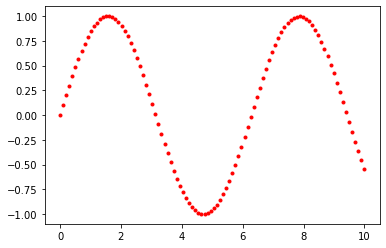

In [60]:
plt.plot(x,y,'r.')
plt.show()

In [66]:
plt?

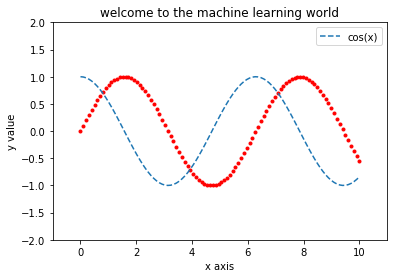

In [61]:
#以点连成折线图
cosy = np.cos(x)
siny = y.copy()
plt.plot(x,siny,'r.')
plt.plot(x,cosy,linestyle="--",label="cos(x)")
plt.xlim(0,10)
plt.axis([-1,11,-2,2]) # 坐标范围
plt.xlabel("x axis")
plt.ylabel("y value")
plt.legend() # 图示，配合plot里的label
plt.title("welcome to the machine learning world")
plt.show()

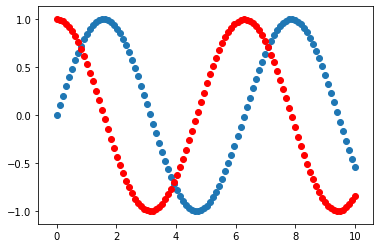

In [198]:
#绘制散点图
plt.scatter(x,siny)
plt.scatter(x,cosy,color="red")
plt.show()

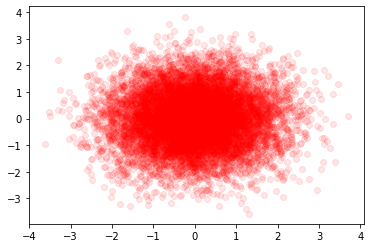

In [200]:
x=np.random.normal(0,1,10000) # 标准正态分布
y=np.random.normal(0,1,10000) # 标准正态分布
plt.scatter(x,y,alpha=0.1,color='red') # 二维标准正态分布
plt.show()

#### 数据加载和简单的数据探索

In [68]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [83]:
iris = datasets.load_iris() # 加载方法，返回Bunch对象
type(iris) # sklearn.utils.Bunch  类
iris # 明显是一个 字典

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [78]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [80]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [262]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [210]:
iris.data.shape
#一共150个样本，每个样本有四个特征

(150, 4)

In [211]:
iris.target#代表了三种类型，上述150个样本的每一行都对应了一个target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [212]:
iris.target_names # 分别是target三种花对应的名称

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

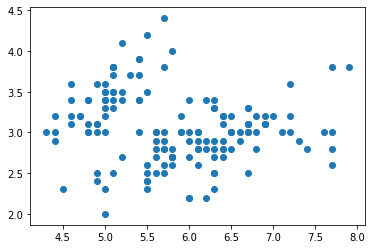

In [215]:
X = iris.data[:,:2]#选取前两列
X.shape            #150*2
plt.scatter(X[:,0],X[:,1]) # 横坐标是一个特征，纵坐标是一个特征
plt.show()

In [89]:
X=iris.data[:,:2]
y=iris.target
X[y==0,0] # 筛选出了target=0这种类型的花，对应的第一个特征的值  一共50个

50

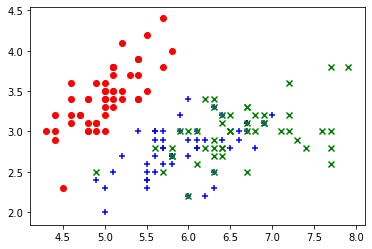

In [281]:
y=iris.target #导入标记值，用于区分三种不同的样本对应的特征
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker="o") # 多了一步筛选行：筛选出第一种花的所有行，以其两个特征作为横纵坐标
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker="+")
plt.scatter(X[y==2,0],X[y==2,1],color='green',marker="x")
plt.show()

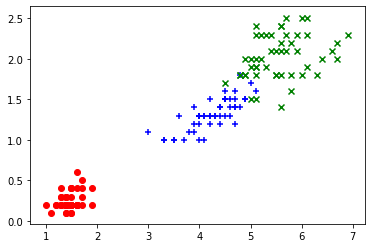

In [282]:
y=iris.target #导入标记值
X=iris.data
plt.scatter(X[y==0,2],X[y==0,3],color='red',marker="o")
plt.scatter(X[y==1,2],X[y==1,3],color='blue',marker="+")
plt.scatter(X[y==2,2],X[y==2,3],color='green',marker="x")
plt.show()